<a href="https://colab.research.google.com/github/dm1794/Complete-Python-3-Bootcamp/blob/master/Multitask_FrozenEncoder_seen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import pandas as pd
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
from keras.callbacks import ModelCheckpoint, EarlyStopping
# %reload_ext mermaid
# import IPython
# IPython.load_ipython_extensions(["nb-mermaid/nb-mermaid"]);

Using TensorFlow backend.


In [0]:
import tensorflow  as tf
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D, Dropout,UpSampling2D, Dense, MaxPooling2D, BatchNormalization, Input, Flatten, Lambda
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.optimizers import Adadelta, SGD, Adam
from keras.utils import to_categorical
import keras.backend as K

In [0]:
tf_config = tf.ConfigProto(allow_soft_placement=False)
tf_config.gpu_options.allow_growth = True
s = tf.Session(config=tf_config)
K.set_session(s)

In [4]:

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
csv_data = pd.read_csv('./drive/My Drive/Colab Notebooks/Project-2 AML/15features.csv')
display(csv_data.head()), display(csv_data.shape)
train_path = './drive/My Drive/Colab Notebooks/Project-2 AML/seen-dataset/TrainingSet/'
train_images = os.listdir(train_path)

val_path = './drive/My Drive/Colab Notebooks/Project-2 AML/seen-dataset/ValidationSet/'
val_images = os.listdir(val_path)
len(train_images)+len(val_images)

,imagename,pen_pressure,letter_spacing,size,dimension,is_lowercase,is_continuous,slantness,tilt,entry_stroke_a,staff_of_a,formation_n,staff_of_d,exit_stroke_d,word_formation,constancy
0,0968c_num1.png,2,2,2,1,2,2,3,2,1,2,2,3,2,2,1
1,0809c_num2.png,2,2,2,2,2,2,3,1,1,2,2,3,1,2,2
2,0237b_num6.png,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2
3,0069b_num2.png,2,2,2,1,2,2,1,1,1,1,1,1,1,1,1
4,0966c_num4.png,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2


(13570, 16)

2

# New Section

In [6]:
dataset_columns = csv_data.columns
csv_data['imagename'] = csv_data['imagename'].astype('str')
display(csv_data.head(20))
csv_data.shape

,imagename,pen_pressure,letter_spacing,size,dimension,is_lowercase,is_continuous,slantness,tilt,entry_stroke_a,staff_of_a,formation_n,staff_of_d,exit_stroke_d,word_formation,constancy
0,0968c_num1.png,2,2,2,1,2,2,3,2,1,2,2,3,2,2,1
1,0809c_num2.png,2,2,2,2,2,2,3,1,1,2,2,3,1,2,2
2,0237b_num6.png,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2
3,0069b_num2.png,2,2,2,1,2,2,1,1,1,1,1,1,1,1,1
4,0966c_num4.png,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2
5,1316a_num2.png,2,2,1,1,2,2,3,1,1,2,2,2,3,2,2
6,1503c_num2.png,2,1,2,2,2,2,2,1,1,3,2,2,3,2,2
7,0113c_num1.png,2,3,2,2,2,1,2,1,1,1,2,2,2,2,2
8,0221a_num6.png,2,2,2,2,2,1,1,1,1,4,1,2,3,1,2
9,0068a_num4.png,1,1,2,2,2,2,1,1,1,2,2,2,2,2,2


(13570, 16)

In [0]:
# train_csv_data =  csv_data[:700]
# val_csv_data =  csv_data[700:]
# train_csv_data.shape, val_csv_data.shape

In [8]:
f = []
for col in dataset_columns[1:]:
    f.append(csv_data[col].unique().shape[0])
f,len(f)

([2, 3, 3, 3, 2, 2, 4, 2, 2, 4, 2, 3, 4, 2, 2], 15)

In [9]:
input_img = Input(shape=(64, 64, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same', name='encoded')(x)
# encoded = GlobalAveragePooling2D()(x)

# encoder = Model(input_img, encoded)
# encoder.summary()
# print(encoded.shape)
# encoded = Flatten()(x)
# encoded = Dense(8*8*8)(encoded)
# # model = Model(input_img,encoded)
# # print(model.summary())
# # at this point the representation is (4, 4, 8) i.e. 128-dimensional
# r = Reshape(target_shape=(8,8,8))(encoded)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same',name='output')(x)

autoencoder = Model(input_img, decoded)
# autoencoder.load_weights('./drive/My Drive/Colab Notebooks/AML - Project 2/seen-dataset/weights/simple_ae_maxpool_seen_weights_v1.h5')

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
encoder = Model(autoencoder.input,autoencoder.get_layer('encoded').output)
encoder.summary()
for layer in encoder.layers:
    layer.trainable = False

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [11]:
f

[2, 3, 3, 3, 2, 2, 4, 2, 2, 4, 2, 3, 4, 2, 2]

In [12]:

# # model = Sequential()
# input_layer = Input((64,64,1))
# model = BatchNormalization()(input_layer)

# model = Conv2D(activation='relu',filters=32, kernel_size=(32,32), padding='same')(model)
# model = Conv2D(activation='relu',filters=64, kernel_size=(32,32), strides=(1,1), padding='same')(model)
# model = MaxPool2D((2,2))(model)
# model = Dropout(0.25)(model)

# model = Conv2D(activation='relu',filters=128, kernel_size=(16,16), padding='same')(model)
# model = Conv2D(activation='relu',filters=256, kernel_size=(16,16), strides=(1,1), padding='same')(model)
# model = MaxPool2D((2,2))(model)
# model = Dropout(0.25)(model)

# model = Conv2D(activation='relu',filters=128, kernel_size=(8,8), padding='same')(model)
# model = Conv2D(activation='relu',filters=256, kernel_size=(8,8), strides=(1,1), padding='same')(model)
# model = MaxPool2D((2,2))(model)
# model = Dropout(0.25)(model)
# # model = Flatten()(model)

# dense_layer = Dense(512, activation='relu')(model)
# dense_layer = Dropout(0.5)(dense_layer)
dense_layer = encoder.get_layer('encoded').output
out_dense_layer=[]
for i in range(1,len(f)+1):
    out_dense_layer.append(Dense(f[i-1] , activation='softmax', name = 'out_feature_'+str(i))(Dense(128 , activation='relu', name = 'dense_layer_'+str(i))(Flatten()((dense_layer)))))

human_features = Model(inputs=encoder.input, outputs=out_dense_layer)
human_features.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 16)   160         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 32, 32, 16)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 32)   4640        max_pooling2d_1[0][0]            
__________________________________________________________________________________________________
max_poolin

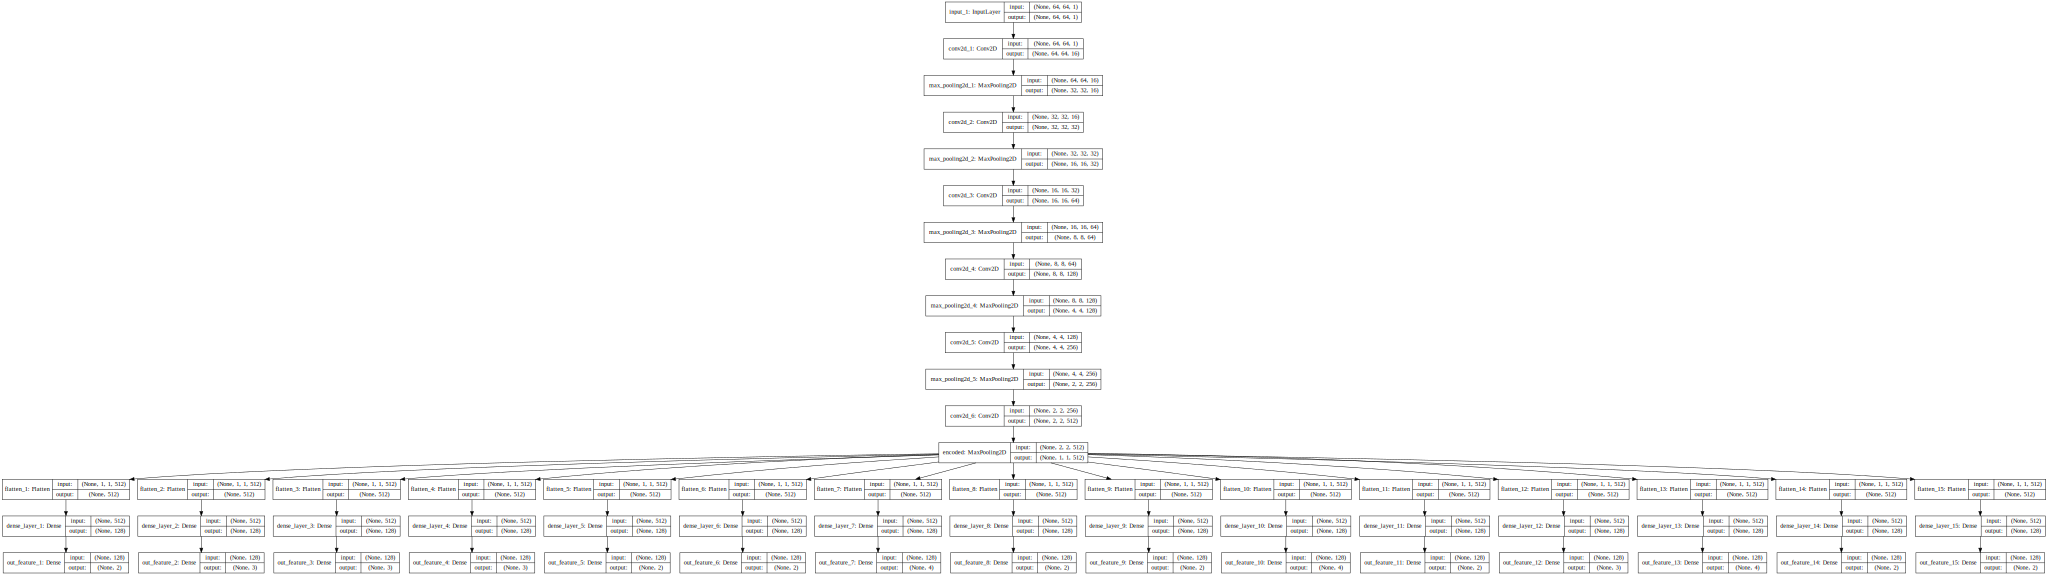

In [13]:
SVG(model_to_dot(human_features, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

In [14]:
feature_lengths = {}
for col in dataset_columns[1:]:
    feature_lengths[col] = len(csv_data[col].unique())
feature_lengths = list(feature_lengths.values())
feature_lengths, len(feature_lengths)

([2, 3, 3, 3, 2, 2, 4, 2, 2, 4, 2, 3, 4, 2, 2], 15)

In [0]:
# df_data[df_data['f8']==2]

In [0]:
# im = images[images['image'].str.match('1229b')]
# im.iloc[0]['image']

In [0]:
# csv_data[csv_data['ImageId'].str.match('1302c')]

In [0]:

def datagen(batch_size,image_path,list_of_writers, vshift = (-64,64) ,vis=False):
    counter = 0
    w_ids,ids,x,y,imagenames, feature_list = [],[],[],[],[],[]
    while True:
#         counter = 0
        # for writer in unique_writers:
        #     print(identitycounter*100/stop_at, end='\r')
        
        writer_index = np.random.randint(0,len(list_of_writers))
        
#         for writer_index in writer_indexes:
#             class_vectors = []
#             features = None
        imagename = list_of_writers[writer_index]
#             print('-->',csv_data['imagename'][0],imagename)
#             display(csv_data[csv_data['imagename']==imagename].values[0][1:])
        features = csv_data[csv_data['imagename']==imagename].values
        if len(features)==0:
#             print('no features', imagename)
            continue
        features = features[0][1:]-1
#             print(features)
#             print(writer)
#             writer_samples = list(images[images['image'].str.match(writer)]['image'])
#             print('writer:',writer,', writer_samples:',writer_samples)
#             if len(writer_samples) == 0:
#                 continue
#             writer_sample_index = np.random.randint(0,len(writer_samples))

#             #     unique_writers_count[writer] = len(writer_samples)
# #             print('writer_sample_index:',writer_sample_index)
#             csv_writer = writer_samples[writer_sample_index][:5]


        loaded_image = cv2.imread(os.path.join(image_path,imagename),0)
        rand = np.random.randint(vshift[0],vshift[1])
        loaded_image_shifted=np.roll(axis=0,a=loaded_image,shift=rand)

        x.append(255.0-loaded_image_shifted.reshape((64,64,1)))
        y.append(255.0-loaded_image.reshape((64,64,1)))
        w_ids.append(imagename[:4])
#         print(w_ids)
        imagenames.append(imagename)
#         print(imagenames)
        ids.append(writer_index)
        feature_list.append(features)
#         print(imagename)
        counter+=1
#         print('counter:', counter, end='\r')
        if counter == batch_size:
            counter=0
            feature_list = np.array(feature_list)
            feature_list = feature_list.transpose()
#             print(len(feature_list[1]))
#             print(len(feature_list[1]))
#             print(feature_lengths[1])
#             print(to_categorical(feature_list[14],num_classes=feature_lengths[14]).shape)
            out_cat_features = []
            for i in range(len(feature_list)):
#                 print(feature_list[1])
                out_cat_features.append(to_categorical(feature_list[i],num_classes=feature_lengths[i]))
#             print(out_cat_features)
            if vis== True:
                yield np.array(x)/255.0,[np.array(w_ids),np.array(imagenames)]
            else:
                yield np.array(x)/255.0,out_cat_features
            w_ids,ids,x,y,imagenames,feature_list =[], [],[], [],[],[]    

In [0]:

batch_size = 64

tg = datagen(batch_size,image_path=train_path,vshift=(-10,10),list_of_writers=train_images)
vg = datagen(batch_size,image_path=val_path,vshift=(-10,10), list_of_writers=val_images)


In [0]:
inputs,o = next(tg)
print(inputs.shape)
(o[1]).shape
# o
# print(o.head())

In [0]:
# images
inputs,o = next(tg)
print(inputs.shape)
for op in o:
    print((np.argmax(op, axis=1)+1)[0])
#     print('------')
# feature_list

(64, 64, 64, 1)
1
2
3
3
2
2
1
1
1
2
2
2
2
1
1


In [0]:
csv_data[csv_data['imagename']=='0066c_num3.png'].values[0][1:]

array([2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1], dtype=object)

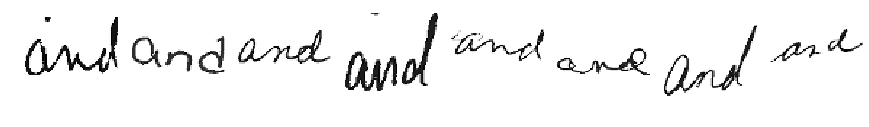

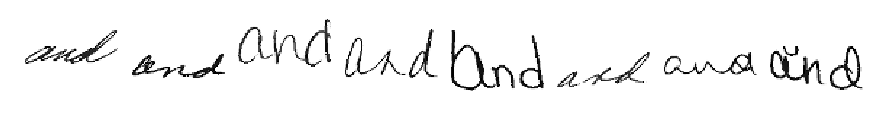

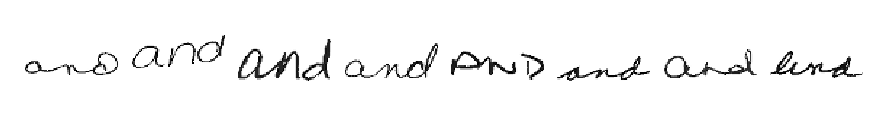

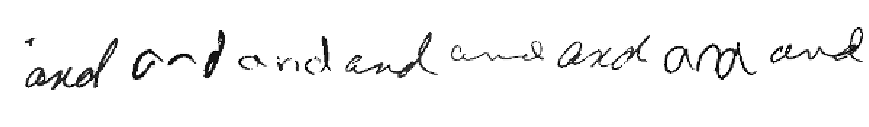

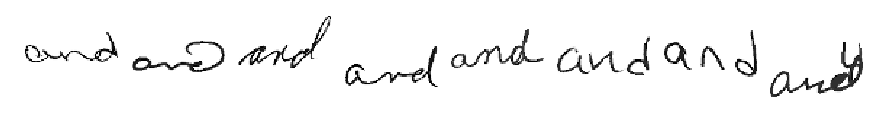

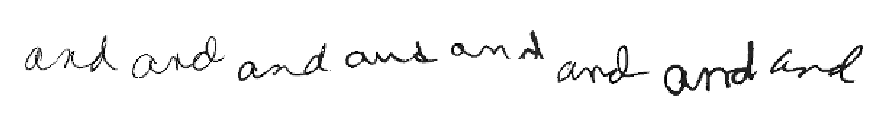

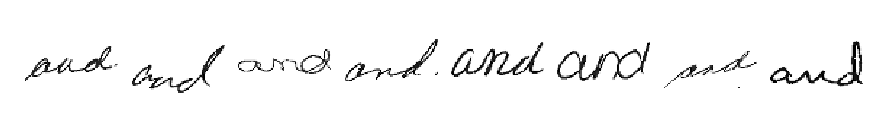

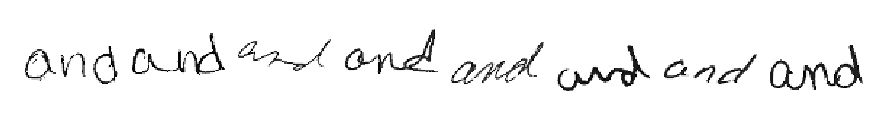

In [0]:
for r in range(8):
    f,ax = plt.subplots(1,8)
    f.subplots_adjust(hspace = .00, wspace=.15)
    f.set_size_inches(15,5)
    for c in range (8):
        ax[c].imshow(inputs[c+r*8].reshape((64,64)))
        ax[c].axis('off')

In [0]:
losses = {}
lossWeights = {}
for i in range(1,16):
    losses["out_feature_"+str(i)] = "categorical_crossentropy"
    lossWeights["out_feature_"+str(i)] = 1.0
# lossWeights["out_feature_1"] = 10.0
# lossWeights["out_feature_2"] = 8.0
# lossWeights["out_feature_3"] = 0.1
# lossWeights["out_feature_4"] = 8.0
# lossWeights["out_feature_5"] = 1.0
# lossWeights["out_feature_6"] = 5.0
# lossWeights["out_feature_7"] = 5.0
# lossWeights["out_feature_8"] = 10.0


In [0]:
mc = ModelCheckpoint(filepath='./drive/My Drive/Colab Notebooks/AML - Project 2/seen-dataset/weights/15-Multitask-FrozenEncoder-seen_v2.h5', monitor='val_loss',period=1,save_best_only=True,save_weights_only=True,mode='auto',verbose=3)
es = EarlyStopping(patience=10000, monitor='val_loss', min_delta=0.0005, mode='auto')

In [0]:
# EPOCHS = 500000
EPOCHS=5000
INIT_LR = 0.01
opt = SGD(lr=INIT_LR, decay=1e-6, momentum=0.95, nesterov=True)
# opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# opt = Adadelta(lr=INIT_LR, decay=1e-04)

# feat_extractor.compile(optimizer=opt, loss=losses, loss_weights=lossWeights,metrics=["accuracy"])


human_features.compile(optimizer=opt, loss=losses, loss_weights=lossWeights,metrics=["accuracy"])
human_features.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 16)   160         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 32, 32, 16)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 32)   4640        max_pooling2d_1[0][0]            
__________________________________________________________________________________________________
max_poolin

In [0]:
human_features.load_weights('./drive/My Drive/Colab Notebooks/AML - Project 2/seen-dataset/weights/15-Multitask-FrozenEncoder-seen_v1.h5')
hist = human_features.fit_generator(tg, callbacks=[mc,es]
                                    , epochs=EPOCHS
                                    , steps_per_epoch = 1
                                    , validation_data = vg
                                    , validation_steps = 1
                                    , verbose = 3 
                                   )

Epoch 1/5000

Epoch 00001: val_loss did not improve from 10.60804
Epoch 2/5000

Epoch 00002: val_loss did not improve from 10.60804
Epoch 3/5000

Epoch 00003: val_loss did not improve from 10.60804
Epoch 4/5000

Epoch 00004: val_loss did not improve from 10.60804
Epoch 5/5000

Epoch 00005: val_loss did not improve from 10.60804
Epoch 6/5000

Epoch 00006: val_loss did not improve from 10.60804
Epoch 7/5000

Epoch 00007: val_loss did not improve from 10.60804
Epoch 8/5000

Epoch 00008: val_loss did not improve from 10.60804
Epoch 9/5000

Epoch 00009: val_loss did not improve from 10.60804
Epoch 10/5000

Epoch 00010: val_loss did not improve from 10.60804
Epoch 11/5000

Epoch 00011: val_loss did not improve from 10.60804
Epoch 12/5000

Epoch 00012: val_loss did not improve from 10.60804
Epoch 13/5000

Epoch 00013: val_loss did not improve from 10.60804
Epoch 14/5000

Epoch 00014: val_loss did not improve from 10.60804
Epoch 15/5000

Epoch 00015: val_loss did not improve from 10.60804
Epoc

Changed based on the .min value printed. Mohammad had used around 5.7 based on the 500000 epochs he ran.

10.60804271697998


,loss,out_feature_10_acc,out_feature_10_loss,out_feature_11_acc,out_feature_11_loss,out_feature_12_acc,out_feature_12_loss,out_feature_13_acc,out_feature_13_loss,out_feature_14_acc,...,val_out_feature_5_acc,val_out_feature_5_loss,val_out_feature_6_acc,val_out_feature_6_loss,val_out_feature_7_acc,val_out_feature_7_loss,val_out_feature_8_acc,val_out_feature_8_loss,val_out_feature_9_acc,val_out_feature_9_loss
158,11.647491,0.625000,1.075368,0.750000,0.559738,0.515625,0.972024,0.343750,1.359419,0.609375,...,1.000000,0.055108,0.593750,0.687390,0.734375,0.957985,0.921875,0.333688,0.984375,0.131815
192,11.761589,0.593750,1.093347,0.812500,0.486714,0.468750,0.997255,0.390625,1.301326,0.437500,...,0.984375,0.092962,0.640625,0.653879,0.546875,1.014019,0.812500,0.481142,1.000000,0.083067
203,11.289199,0.578125,1.111004,0.671875,0.655906,0.546875,0.929989,0.531250,1.238840,0.562500,...,0.984375,0.091744,0.625000,0.664186,0.609375,1.146811,0.843750,0.438028,0.968750,0.157706
209,11.937830,0.562500,1.136133,0.718750,0.598790,0.531250,0.967922,0.515625,1.242443,0.625000,...,1.000000,0.040373,0.609375,0.673926,0.625000,1.056334,0.859375,0.414267,0.968750,0.155310
216,11.713398,0.562500,1.165131,0.843750,0.450470,0.453125,0.985286,0.406250,1.303571,0.500000,...,1.000000,0.038890,0.656250,0.641947,0.656250,1.026269,0.875000,0.393095,0.984375,0.116788
220,11.561254,0.546875,1.164511,0.781250,0.523961,0.500000,0.973211,0.453125,1.244152,0.546875,...,1.000000,0.037854,0.640625,0.652757,0.625000,1.025109,0.890625,0.370690,0.984375,0.115503
231,11.749737,0.562500,1.124725,0.734375,0.577686,0.515625,0.898165,0.359375,1.335392,0.593750,...,1.000000,0.036522,0.656250,0.643446,0.500000,1.118729,0.890625,0.370553,0.937500,0.233615
232,11.711799,0.578125,1.120830,0.750000,0.559886,0.546875,0.946078,0.453125,1.245689,0.500000,...,1.000000,0.035964,0.593750,0.684313,0.640625,1.043200,0.859375,0.414871,0.984375,0.113417
237,11.760045,0.468750,1.265239,0.765625,0.539761,0.500000,0.845288,0.437500,1.327439,0.515625,...,1.000000,0.035777,0.593750,0.685186,0.500000,1.213516,0.921875,0.324358,1.000000,0.073012
241,11.284858,0.625000,1.084126,0.796875,0.506357,0.515625,0.915207,0.406250,1.359525,0.515625,...,0.984375,0.086215,0.609375,0.672130,0.515625,1.153458,0.968750,0.255287,1.000000,0.071810


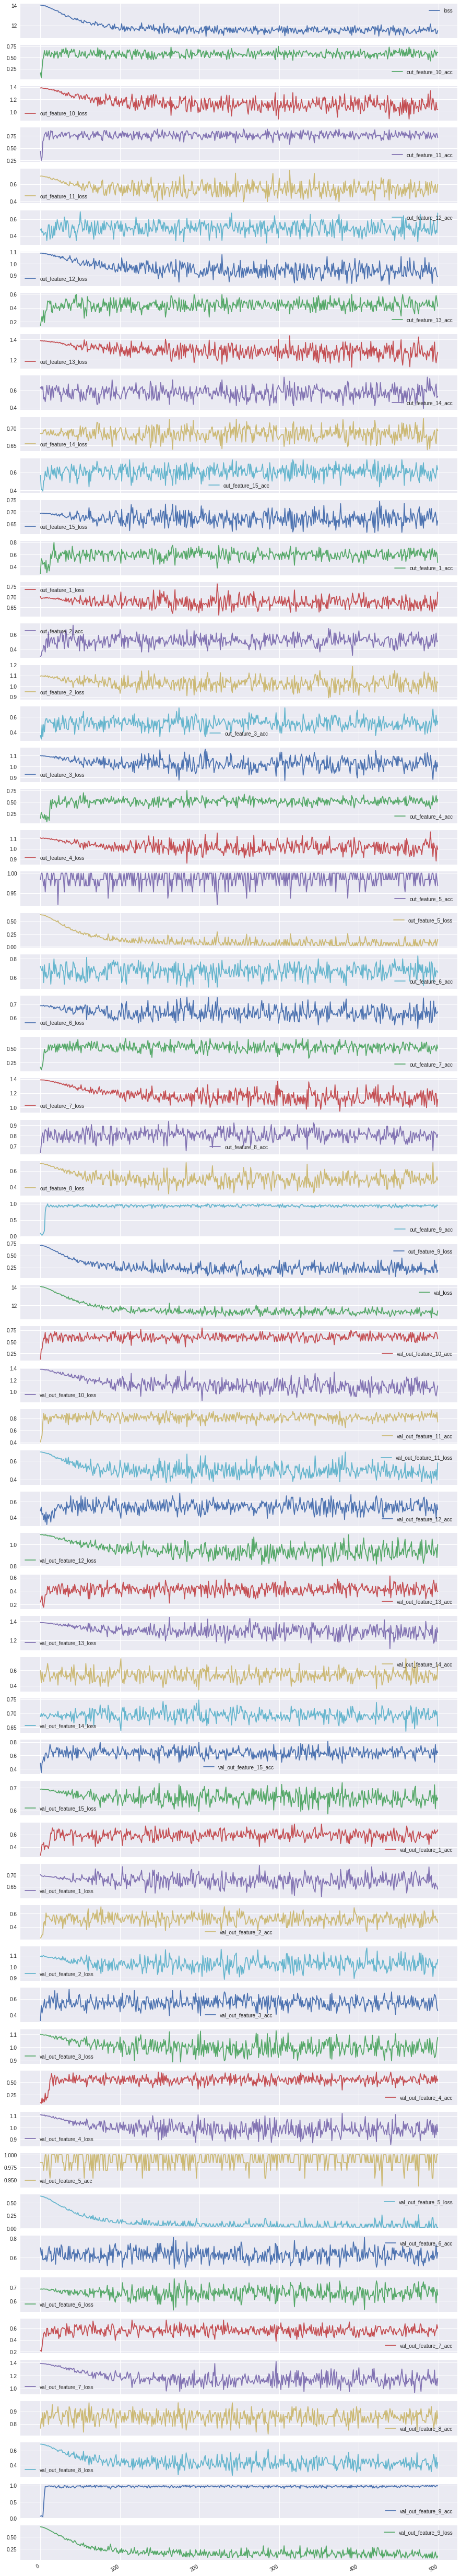

In [0]:
df_hist = pd.DataFrame(hist.history)
df_hist.plot(subplots=True, figsize=(15,100))
print(df_hist['val_loss'].min())
df_hist[df_hist['val_loss']<9]  ## Changed

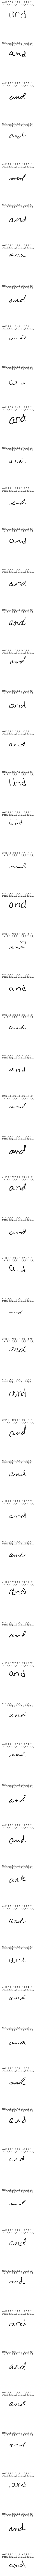

In [0]:
# human_features.load_weights('human_features_weights_v2.h5')
human_features.load_weights('./drive/My Drive/Colab Notebooks/AML - Project 2/seen-dataset/weights/15-Multitask-FrozenEncoder-seen_v1.h5')
vx,vo=next(vg)
# print(len(vo))
fig = plt.figure(figsize=(80,200))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=1.51, wspace=0.05)
for i in range(64):
#     print(i, '\nPredicted:')
    
    real=''
    for f in range(15):
#         print(vo[i][f])
        real+=str(np.argmax(vo[f][i])+1)+','
    
    f_probs = human_features.predict(np.expand_dims(vx[i],0))
#     print(f_probs)
    pred=''
    for prob in f_probs:
#         print(prob)
        pred+=str(np.argmax(prob[0])+1)+','
    
    ax = fig.add_subplot(64, 1, i + 1, xticks=[], yticks=[])
    ax.imshow(vx[i].reshape((64,64)))
    ax.set_title('real:'+real+'\n pred:'+pred)
#     print('\n----------')
#     print('True:')
#     for op in o:
#         print(np.argmax(op[i]),end=',')
        
#     print('\n++++++',i,'++++++')

In [0]:
df_hist.shape

(500, 62)

Changing below valu for the sake of checking as we are getting an error of index out of bounds

In [0]:
# print(df_hist.columns)
total = 0
for i in range(1,16):
    print(df_hist.iloc[3]['val_out_feature_{0}_acc'.format(i)].max())
    total+=df_hist.iloc[3]['val_out_feature_{0}_acc'.format(i)]
print('total_acc:',total/15)
# print(np.mean([df_hist['val_out_feature_1_acc'].max(), df_hist['val_out_feature_2_acc'].max(),
#        df_hist['val_out_feature_3_acc'].max(), df_hist['val_out_feature_4_acc'].max(),
#        df_hist['val_out_feature_5_acc'].max(), df_hist['val_out_feature_6_acc'].max(),
#        df_hist['val_out_feature_7_acc'].max(), df_hist['val_out_feature_8_acc'].max()]))
# df_hist[df_hist['val_acc']>10.2]

0.4375
0.28125
0.484375
0.09375
0.984375
0.578125
0.40625
0.890625
0.046875
0.484375
0.734375
0.453125
0.1875
0.484375
0.515625
total_acc: 0.4708333333333333


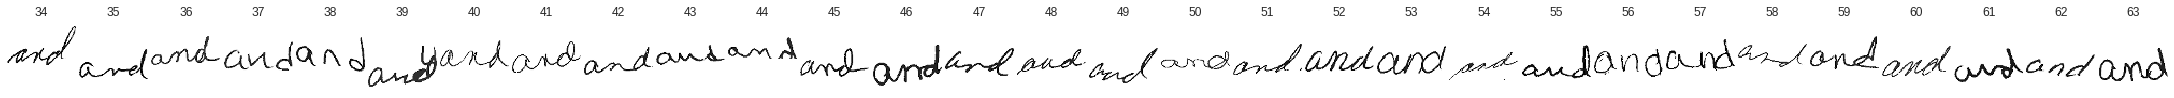

In [0]:
fig = plt.figure(figsize=(30,30))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(30):
    ax = fig.add_subplot(1, 30, i + 1, xticks=[], yticks=[])
    ax.imshow(inputs[64-30:64][i].reshape((64,64)))
    ax.set_title(i+34)

In [0]:
csv_data.var()

pen_pressure      0.241190
letter_spacing    0.481638
size              0.475689
dimension         0.464579
is_lowercase      0.014808
is_continuous     0.222378
slantness         0.866958
tilt              0.152430
entry_stroke_a    0.053592
staff_of_a        0.862689
formation_n       0.176950
staff_of_d        0.409782
exit_stroke_d     1.054210
word_formation    0.245240
constancy         0.239313
dtype: float64

# Evaluation

In [0]:
test_g = datagen(len(val_images),val_path,val_images, vshift = (-10,10), vis=True)
testx,testy = next(test_g)

In [0]:
testx.shape

(944, 64, 64, 1)

In [0]:
pred_flat = []
for i in range(1,len(feature_lengths)+1):
    pred_flat.append(human_features.get_layer('dense_layer_'+str(i)).output)
human_features_eval = Model(inputs=human_features.input, outputs=pred_flat)
human_features_encoder = Model(human_features.input,human_features.get_layer('encoded').output)

In [0]:
feature_wise_pred_y=human_features_eval.predict(testx)
latent_pred_y=human_features_encoder.predict(testx)

In [0]:
feature_wise_pred_y=np.array(feature_wise_pred_y)
latent_pred_y=np.array(latent_pred_y).reshape((-1,512))

In [0]:
latent_pred_y.shape,feature_wise_pred_y.shape

((944, 512), (15, 944, 128))

In [0]:
ids = testy[0].reshape(-1,1)
imagenames = testy[1].reshape(-1,1)
data=[]
for i in range(len(testx)):
    data.append([ids[i][0],imagenames[i][0],latent_pred_y[i]])
df_data = pd.DataFrame(data=data, columns=['identity','imagename','latent'])
# df_outs['ids'] = ids
# df_outs['preds'] = preds 
df_data=df_data.sort_values(by='identity').reset_index()
df_data.head(10)

,index,identity,imagename,latent
0,494,0001,0001a_num2.png,"[0.010288982, 0.0159097, 0.037543762, 0.020565..."
1,75,0001,0001a_num2.png,"[0.016125169, 0.011784835, 0.047139883, 0.0245..."
2,144,0001,0001a_num1.png,"[0.021230023, 0.010607362, 0.046928655, 0.0235..."
3,463,0001,0001a_num1.png,"[0.021230023, 0.010607362, 0.046928655, 0.0235..."
4,879,0001,0001a_num2.png,"[0.013670298, 0.01466614, 0.037710432, 0.02817..."
5,247,0002,0002a_num2.png,"[0.013489406, 0.014012158, 0.04417103, 0.02938..."
6,451,0002,0002a_num1.png,"[0.0068682786, 0.011969553, 0.03853176, 0.0213..."
7,895,0004,0004aa_num1.png,"[0.00939452, 0.012957149, 0.0430989, 0.0204484..."
8,637,0005,0005a_num1.png,"[0.017598541, 0.01886436, 0.040581673, 0.01806..."
9,592,0005,0005a_num1.png,"[0.006764932, 0.006603392, 0.036656957, 0.0201..."


In [0]:
cos_dist_out.head()

identity,0001,0001,0001,0002,0002,0004,0005,0005,0005,0005,...,1556,1556,1556,1556,1560,1560,1565,1565,1565,1565
identity,,,,,,,,,,,,,,,,,,,,,
0001,1.000000,0.965838,0.928131,0.980516,0.973129,0.890758,0.959571,0.914333,0.969890,0.981480,...,0.958618,0.919479,0.930067,0.931299,0.907219,0.945398,0.940900,0.927725,0.961745,0.893838
0001,0.965838,1.000000,0.952601,0.967291,0.956984,0.916441,0.979565,0.937601,0.980141,0.970340,...,0.976473,0.941120,0.951816,0.952062,0.932539,0.967065,0.970772,0.954270,0.972683,0.919515
0001,0.928131,0.952601,1.000000,0.927423,0.933856,0.956350,0.956075,0.979036,0.946176,0.936210,...,0.959910,0.982808,0.983622,0.985084,0.969327,0.964667,0.965861,0.977419,0.944832,0.960630
0002,0.980516,0.967291,0.927423,1.000000,0.974021,0.890728,0.961148,0.910905,0.968180,0.977167,...,0.958828,0.918812,0.928349,0.929322,0.907130,0.943900,0.943329,0.929565,0.962104,0.895182
0002,0.973129,0.956984,0.933856,0.974021,1.000000,0.900567,0.952926,0.923204,0.961371,0.973264,...,0.948232,0.924321,0.931143,0.930964,0.915221,0.943960,0.945230,0.934091,0.958405,0.904743


In [0]:
from sklearn.metrics.pairwise import cosine_similarity
cos_dist_out = pd.DataFrame(cosine_similarity(list(df_data['latent'].values)), index = df_data['identity'], columns = df_data['identity'])

In [0]:
thresholds = [0.7,0.8,0.95]
for th in thresholds:
#         th = 0.6
    t_p=0
    f_p=0
    f_n=0
    t_n=0
    for i in range(cos_dist_out.shape[0]):
        for j in range(cos_dist_out.shape[0]):
            if(cos_dist_out.index[i]==cos_dist_out.columns.values[j] and cos_dist_out.iloc[i,j]>th):
                t_p+=1
            elif(cos_dist_out.index[i]!=cos_dist_out.columns.values[j] and cos_dist_out.iloc[i,j]<th):
                t_n+=1
            elif(cos_dist_out.index[i]!=cos_dist_out.columns.values[j] and cos_dist_out.iloc[i,j]>th):
                f_p+=1
            else:
                f_n+=1
#         print(f_p)
    precision = t_p / (t_p + f_p)
    recall = t_p / (t_p + f_n)  
    print('precision for threshold of '+ str(th) + ' is: '+ str(precision))
    print('recall for threshold of ' + str(th) + ' is: ' + str(recall))
    total=np.sum((t_p,t_n,f_p,f_n))
    accuracy=(t_p+t_n)/total
    print('accuracy',accuracy)

precision for threshold of 0.7 is: 0.003137568227520827
recall for threshold of 0.7 is: 1.0
accuracy 0.003137568227520827
precision for threshold of 0.8 is: 0.003137568227520827
recall for threshold of 0.8 is: 1.0
accuracy 0.003137568227520827
precision for threshold of 0.95 is: 0.003917166660044238
recall for threshold of 0.95 is: 0.84620886981402
accuracy 0.3243769750071818


# OPTIONAL (not changed)

In [0]:
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm_notebook

In [0]:
cos_dist_out = cosine_similarity(list(df_data['latent'].values))

In [0]:
queried_count, idx_count, tp, tn, fp, fn = 0,0,0,0,0,0
cos_thresh = 0.8
data_result = []
fp_list = []
fn_list = []
r_counter = 0
stop_at = 20
prev_query = ''
prev_given = ''
given_count = 0
# total = cos_dist_out.shape[0]
for row in tqdm_notebook(cos_dist_out):
    c_counter = 0
    given_idx = df_data.iloc[r_counter]['identity']
    given_img = df_data.iloc[r_counter]['imagename']
    for col in row:
        queried_idx = df_data.iloc[c_counter]['identity']
        queried_img = df_data.iloc[c_counter]['imagename']
        if int(given_idx) == int(queried_idx) and cos_dist_out[r_counter][c_counter]>cos_thresh:
            tp += 1
        if int(given_idx) != int(queried_idx) and cos_dist_out[r_counter][c_counter]<cos_thresh:
            tn += 1
        if int(given_idx) != int(queried_idx) and cos_dist_out[r_counter][c_counter]>cos_thresh:
            fp += 1
            fp_list.append(os.path.join(queried_idx,queried_img))
        if int(given_idx) == int(queried_idx) and cos_dist_out[r_counter][c_counter]<cos_thresh:
            fn += 1
            fn_list.append(os.path.join(queried_idx,queried_img))
        if int(given_idx) == int(queried_idx):
            idx_count += 1
#             print('--i--',idx_count,'--i--')
#             print(given_idx,queried_idx)
        if prev_query != queried_idx:
#             print('--q--',queried_count,'--q--')
            queried_count += 1
        c_counter += 1
        prev_query = queried_idx
#         if queried_count == stop_at:
#             break
    precision = tp/(fp+tp)
    recall = tp/(tp+fn)
    f1 = 2*(precision*recall)/(precision+recall)
    total = np.sum((tp,tn,fp,fn))
    accuracy = (tp+tn)/total
    data_result.append([given_idx,given_img, idx_count, tp, tn, fp, fn,precision,recall,f1,accuracy, total, fp_list, fn_list])
    if prev_given != given_idx:
#         print('----',given_count,'-----')
        given_count+=1
    r_counter += 1
    prev_given = given_idx
    queried_count, idx_count, tp, tn, fp, fn = 0, 0, 0, 0, 0, 0
    fp_list = []
    fn_list = []
#     if given_count == stop_at:
#         break

In [0]:
df_cos_dist_out = pd.DataFrame(data_result, columns=['identity','imagename','total_images_identity','TP','TN','FP','FN','precision','recall','f1','accuracy','total_images', 'FP_List','FN_List'])
df_cos_dist_out=df_cos_dist_out.sort_values(by='identity',ascending=True).reset_index().drop(columns=['index'])
df_cos_dist_out.head()

In [0]:
# print(df_cos_dist_out.keys())
total = df_cos_dist_out.shape[0]
total_images_identity = df_cos_dist_out['total_images_identity']
tps = df_cos_dist_out['TP'].sum()
fps = df_cos_dist_out['FP'].sum()
tns = df_cos_dist_out['TN'].sum()
fns = df_cos_dist_out['FN'].sum()
precision = tps/(fps+tps)
recall = tps/(tps+fns)
f1 = 2*(precision*recall)/(precision+recall)
print('precision:',precision,'\nrecall:',recall,'\nf1:',f1)
acc = df_cos_dist_out['accuracy'].mean()
print('Intra Writer Accuracy (Type 1):',np.mean(df_cos_dist_out['TP']/total_images_identity))
print('Inter Writer Accuracy (Type 2)::',tns/total/total)
print('acc:',acc)

In [0]:
csv_data.var()